# $\rho/{\tilde\eta}$ v.s. $\Delta H$, $\Delta E$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from matplotlib.gridspec import GridSpec
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
color_list = [rgb_to_hex(237,74,184),rgb_to_hex(158,95,253),rgb_to_hex(255,206,81),rgb_to_hex(119,200,236),rgb_to_hex(24,218,210),rgb_to_hex(111,237,155),rgb_to_hex(102,0,51),rgb_to_hex(0,0,0),rgb_to_hex(211,196,147),rgb_to_hex(186,159,72),rgb_to_hex(89,80,65),rgb_to_hex(231,85,0),rgb_to_hex(0,138,148),rgb_to_hex(223,105,98)]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
mark=np.array(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','o', 'v', '^', '<', '>', '8', 's', 'p', ])
color_list = color_list*2


In [2]:
def E(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): 
		eta = h_pd['h'] / data_['A']
	else: 
		eta = data_['h'] / data_['A']
	if a is None: 
		a, b = 0, 1

	E = pd.Series(0, index=data_.index)  # 각 row별로 저장할 E를 Series로 초기화

	t = [1,2,3,4,5]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']

	for i in range(5):
		phi_t = np.exp(-eta / data_['eta_tilde' + age[i]])
		N_t = data_['RN' + age[i]] * data_['N']
		E += (a * t[i] + b) * N_t * phi_t  # row-wise 연산

	return E  # 각 row별 E 값이 담긴 Series 반환

def E_a(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): 
		eta = h_pd['h'] / data_['A']
	else: 
		eta = data_['h'] / data_['A']
	if a is None: 
		a, b = 0, 1

	E = pd.Series(0, index=data_.index)  # 각 row별로 저장할 E를 Series로 초기화

	t = [1,2,3,4,5]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	E_list = []
	for i in range(5):
		phi_t = np.exp(-eta / data_['eta_tilde' + age[i]])
		N_t = data_['RN' + age[i]] * data_['N']
		E_list.append((a * t[i] + b) * N_t * phi_t)  # row-wise 연산

	return E_list  # 각 row별 E 값이 담긴 Series 반환

def b(data_, a):
	atNp, E_0 = 0,0
	eta = data_['h']/data_['A']
	t = [1,2,3,4,5]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5): 
		E_0 += sum(data_['RD'+age[i]]*data_['D'])
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		atNp += sum( a*t[i]*N_t*phi_t)
	return (E_0-atNp)/E_0 # b

def find_min_a(data):
	save_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'
	ai=0
	E_list=[]
	E_a_min = []
	for i in range(31):
		E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
		E_list.append(E_[-1])
		ai+=1
	a_i=0
	for a in np.linspace(-2, 1, 31):
		if a*5+b(data,a) > 0: 
			E_a_min.append(E_list[a_i])
			break
		a_i+=1
	return a_i

In [3]:
year=2022
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
data = pd.read_csv(path,sep=',')
a_min_i = find_min_a(data)
a_max_i = 23
h_0_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_20.csv')
h_min_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_'+str(a_min_i)+'.csv')
h_max_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_'+str(a_max_i)+'.csv')
y_0 = h_0_opt['h']/data['h']
y_min = h_min_opt['h']/data['h']
a_min=np.linspace(-2,1,31)[a_min_i]
a_max=np.linspace(-2,1,31)[a_max_i]

In [4]:
# 1. 필요한 컬럼 정의
cols = data.columns[10:15]

# 2. 계산
N_age = data[cols].multiply(data['N'], axis=0)
rho_age = N_age.divide(data['A'], axis=0)
tilde_eta_age = data[data.columns[24:24+len(cols)]]

# 3. 위치기반으로 element-wise 연산 → 다시 DataFrame으로 되살림
rho_tilde_eta_age = pd.DataFrame(
    rho_age.values / tilde_eta_age.values,
    columns=cols,
    index=data.index
)

In [5]:
delta_H = h_min_opt - h_0_opt
b_amin = b(data, a=a_min)
b_a0 = b(data, a=0) 
delta_E = E(data, h_pd = h_min_opt, a = a_min, b=b_amin) - E(data, h_pd = h_0_opt, a=0, b=b_a0)

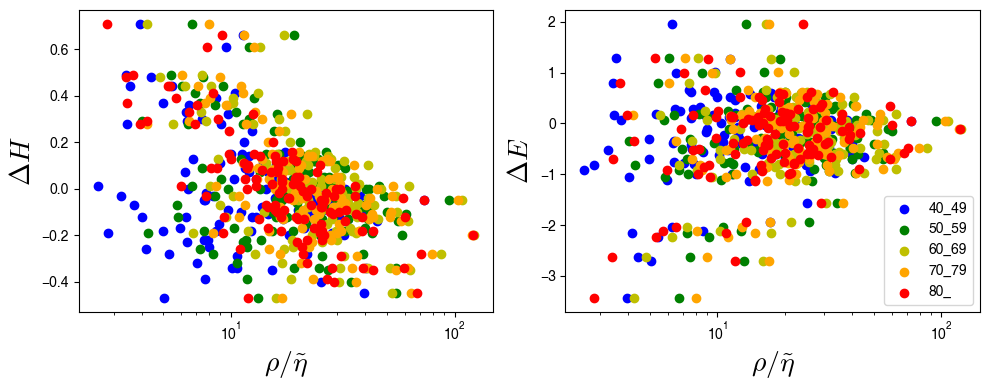

In [6]:
fig = plt.figure(figsize=[10,4])
gs = GridSpec(1, 2)
colors = ['b', 'g', 'y', 'orange','r']
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    ax1.scatter(x, delta_H, c=colors[i])
    ax2.scatter(x, delta_E, c=colors[i],label=cols[i][2:])
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel(r'$\rho/{\tilde\eta}$',size=20)
ax2.set_xlabel(r'$\rho/{\tilde\eta}$',size=20)
ax1.set_ylabel(r'$\Delta H$',size=20)
ax2.set_ylabel(r'$\Delta E$',size=20)
ax2.legend()
plt.tight_layout()
plt.show()

In [7]:
delta_E_age = np.array(E_a(data, h_pd = h_min_opt, a = a_min, b=b_amin))- np.array(E_a(data, h_pd = h_0_opt, a=0, b=b_a0))

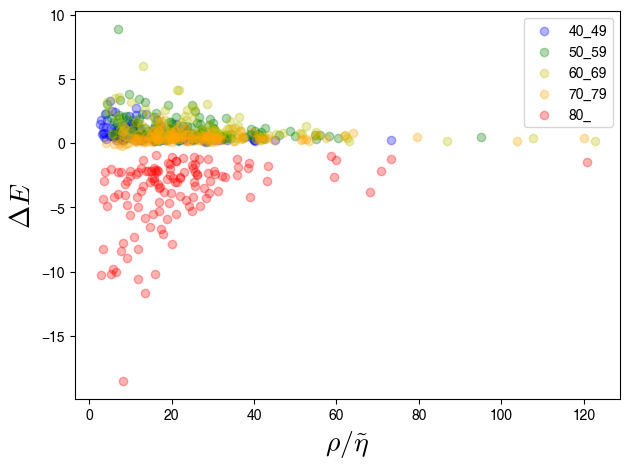

In [8]:
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)
# plt.xscale('log')
plt.xlabel(r'$\rho/{\tilde\eta}$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

# 1 & 3 사분면 표시

In [9]:
df = pd.DataFrame({
    'dE': delta_E,
    'dH': delta_H['h']
})


In [77]:
df_clean = df.dropna()
q1 = df_clean[(df_clean['dE'] > 0) & (df_clean['dH'] > 0)]
q2 = df_clean[(df_clean['dE'] < 0) & (df_clean['dH'] > 0)]
q3 = df_clean[(df_clean['dE'] < 0) & (df_clean['dH'] < 0)]
q4 = df_clean[(df_clean['dE'] > 0) & (df_clean['dH'] < 0)]

In [11]:
q3.index

Index([  2,   7,   9,  13,  14,  15,  19,  20,  38,  39,  41,  52,  53,  55,
        56,  57,  58,  61,  65,  67,  68,  71,  72,  73,  74,  76,  77,  78,
        79,  81,  82,  83,  84,  85,  86,  87,  88,  89,  97,  98, 100, 101,
       102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 121],
      dtype='int64')

In [12]:
q1.index

Index([  1,  11,  17,  18,  21,  22,  24,  25,  26,  27,  28,  29,  30,  31,
        33,  34,  35,  36,  37,  40,  42,  43,  44,  47,  50,  54,  59,  63,
        64,  70,  95, 118, 122, 123],
      dtype='int64')

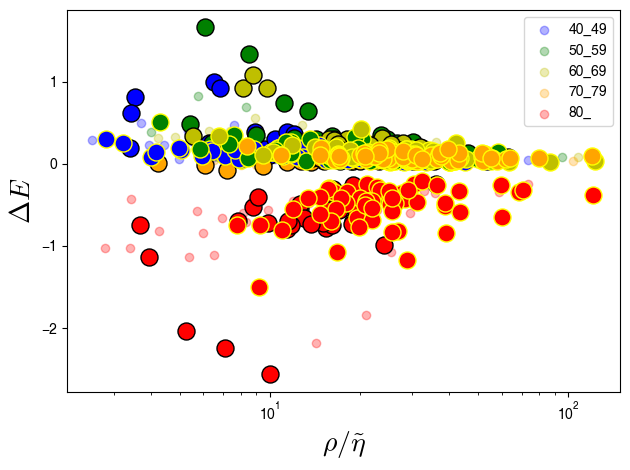

In [13]:
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)

#q1
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q1 = x.loc[q1.index]
    q1_idx = q1.index.to_list()
    y_q1 = y[q1_idx]
    plt.scatter(x_q1, y_q1, c=colors[i], alpha=1, s=150,ec = 'k')
#q3
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q3 = x.loc[q3.index]
    q3_idx = q3.index.to_list()
    y_q3 = y[q3_idx]
    plt.scatter(x_q3, y_q3, c=colors[i], alpha=1, s=150,ec = 'yellow')
plt.xscale('log')
plt.xlabel(r'$\rho/{\tilde\eta}$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

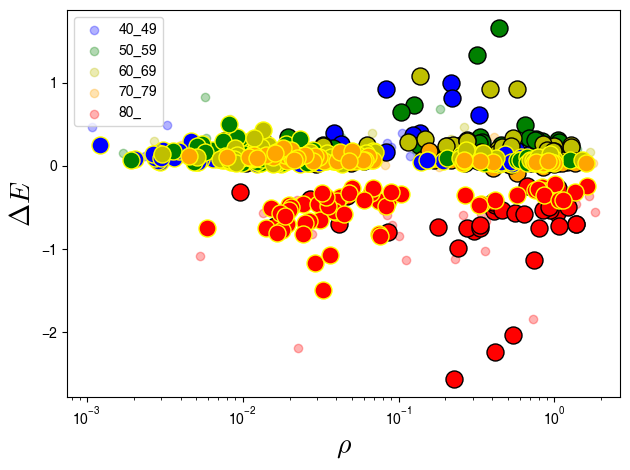

In [14]:
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)

#q1
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q1 = x.loc[q1.index]
    q1_idx = q1.index.to_list()
    y_q1 = y[q1_idx]
    plt.scatter(x_q1, y_q1, c=colors[i], alpha=1, s=150,ec = 'k')
#q3
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q3 = x.loc[q3.index]
    q3_idx = q3.index.to_list()
    y_q3 = y[q3_idx]
    plt.scatter(x_q3, y_q3, c=colors[i], alpha=1, s=150,ec = 'yellow')
plt.xscale('log')
plt.xlabel(r'$\rho$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

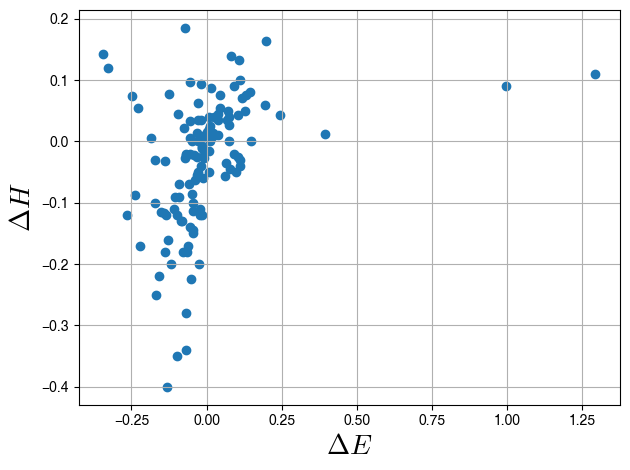

In [15]:
plt.scatter(delta_E/data['D'], delta_H['h']/data['h'])
plt.grid()
plt.ylabel(r'$\Delta H$',size=20)
plt.xlabel(r'$\Delta E$',size=20)
plt.tight_layout()
plt.show()

# 1 & 3 사분면 표시(amin)

In [16]:
year=2022
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
data = pd.read_csv(path,sep=',')
a_min_i = 23#find_min_a(data)
a_max_i = 23
h_0_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_20.csv')
h_min_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_'+str(a_min_i)+'.csv')
h_max_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_'+str(a_max_i)+'.csv')
y_0 = h_0_opt['h']/data['h']
y_min = h_min_opt['h']/data['h']
a_min=np.linspace(-2,1,31)[a_min_i]
a_max=np.linspace(-2,1,31)[a_max_i]

In [17]:
# 1. 필요한 컬럼 정의
cols = data.columns[10:15]

# 2. 계산
N_age = data[cols].multiply(data['N'], axis=0)
rho_age = N_age.divide(data['A'], axis=0)
tilde_eta_age = data[data.columns[24:24+len(cols)]]

# 3. 위치기반으로 element-wise 연산 → 다시 DataFrame으로 되살림
rho_tilde_eta_age = pd.DataFrame(
    rho_age.values / tilde_eta_age.values,
    columns=cols,
    index=data.index
)

In [18]:
delta_H = h_min_opt - h_0_opt
b_amin = b(data, a=a_min)
b_a0 = b(data, a=0) 
delta_E = E(data, h_pd = h_min_opt, a = a_min, b=b_amin) - E(data, h_pd = h_0_opt, a=0, b=b_a0)

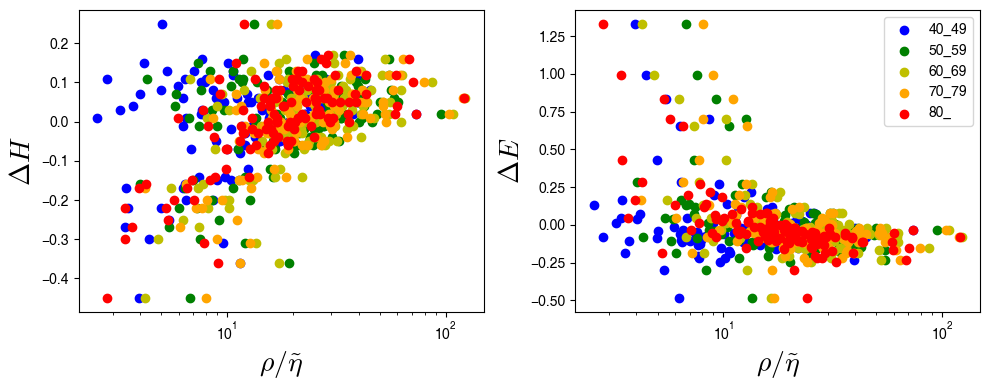

In [19]:
fig = plt.figure(figsize=[10,4])
gs = GridSpec(1, 2)
colors = ['b', 'g', 'y', 'orange','r']
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    ax1.scatter(x, delta_H, c=colors[i])
    ax2.scatter(x, delta_E, c=colors[i],label=cols[i][2:])
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel(r'$\rho/{\tilde\eta}$',size=20)
ax2.set_xlabel(r'$\rho/{\tilde\eta}$',size=20)
ax1.set_ylabel(r'$\Delta H$',size=20)
ax2.set_ylabel(r'$\Delta E$',size=20)
ax2.legend()
plt.tight_layout()
plt.show()

In [20]:
delta_E_age = np.array(E_a(data, h_pd = h_min_opt, a = a_min, b=b_amin))- np.array(E_a(data, h_pd = h_0_opt, a=0, b=b_a0))

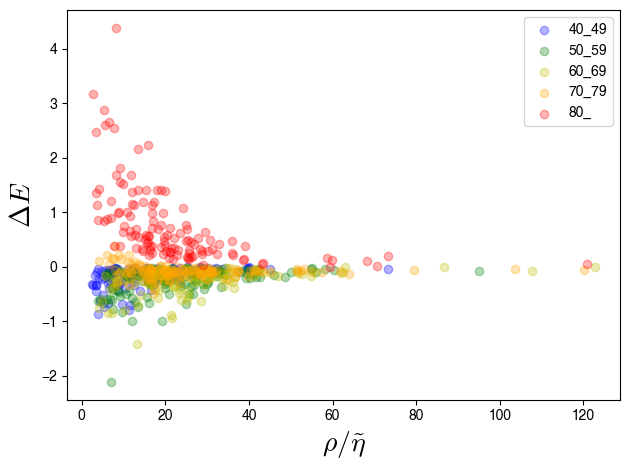

In [21]:
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)
# plt.xscale('log')
plt.xlabel(r'$\rho/{\tilde\eta}$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

# 1 & 3 사분면 표시

In [22]:
df = pd.DataFrame({
    'dE': delta_E,
    'dH': delta_H['h']
})


In [23]:
df_clean = df.dropna()
q1 = df_clean[(df_clean['dE'] > 0) & (df_clean['dH'] > 0)]
q3 = df_clean[(df_clean['dE'] < 0) & (df_clean['dH'] < 0)]

In [24]:
q3.index

Index([  1,  11,  17,  21,  24,  27,  28,  29,  30,  31,  34,  35,  42,  43,
        50,  54,  59,  64,  70,  95, 118],
      dtype='int64')

In [25]:
q1.index

Index([5, 9, 13, 14, 41, 57, 62, 75, 76, 104, 113], dtype='int64')

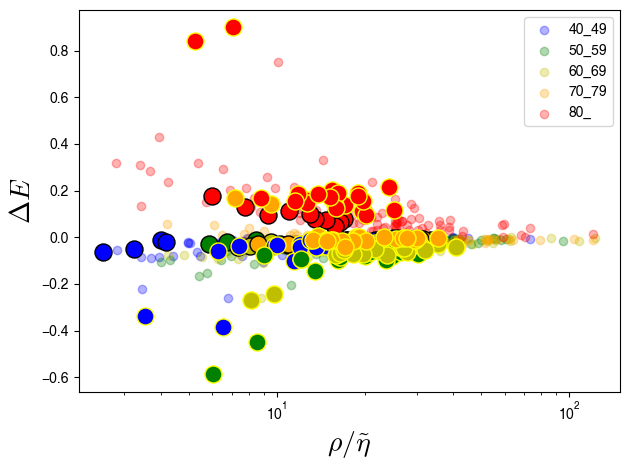

In [26]:
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)

#q1
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q1 = x.loc[q1.index]
    q1_idx = q1.index.to_list()
    y_q1 = y[q1_idx]
    plt.scatter(x_q1, y_q1, c=colors[i], alpha=1, s=150,ec = 'k')
#q3
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q3 = x.loc[q3.index]
    q3_idx = q3.index.to_list()
    y_q3 = y[q3_idx]
    plt.scatter(x_q3, y_q3, c=colors[i], alpha=1, s=150,ec = 'yellow')
plt.xscale('log')
plt.xlabel(r'$\rho/{\tilde\eta}$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

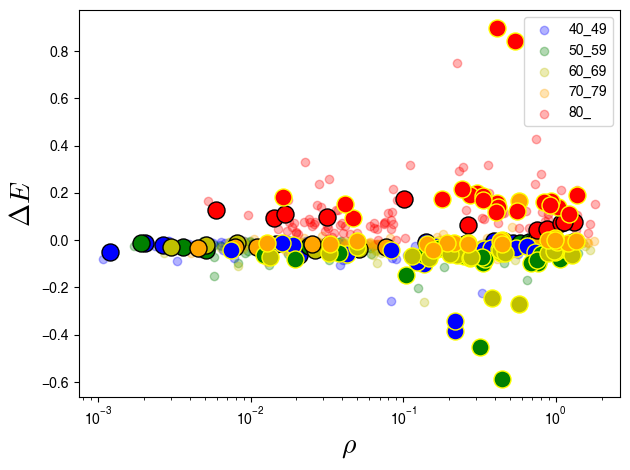

In [27]:
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)

#q1
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q1 = x.loc[q1.index]
    q1_idx = q1.index.to_list()
    y_q1 = y[q1_idx]
    plt.scatter(x_q1, y_q1, c=colors[i], alpha=1, s=150,ec = 'k')
#q3
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q3 = x.loc[q3.index]
    q3_idx = q3.index.to_list()
    y_q3 = y[q3_idx]
    plt.scatter(x_q3, y_q3, c=colors[i], alpha=1, s=150,ec = 'yellow')
plt.xscale('log')
plt.xlabel(r'$\rho$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

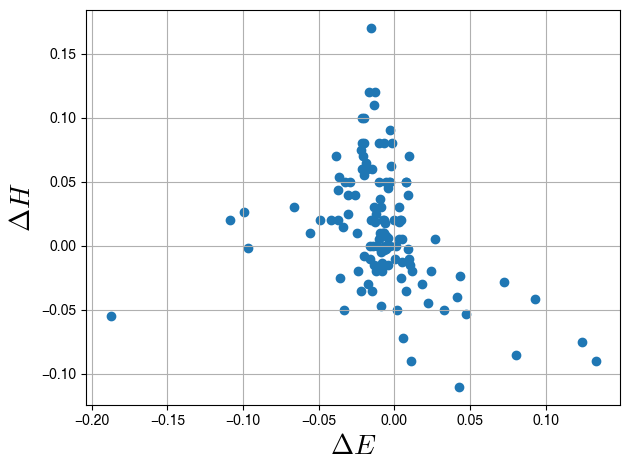

In [28]:
plt.scatter(delta_E/data['D'], delta_H['h']/data['h'])
plt.grid()
plt.ylabel(r'$\Delta H$',size=20)
plt.xlabel(r'$\Delta E$',size=20)
plt.tight_layout()
plt.show()

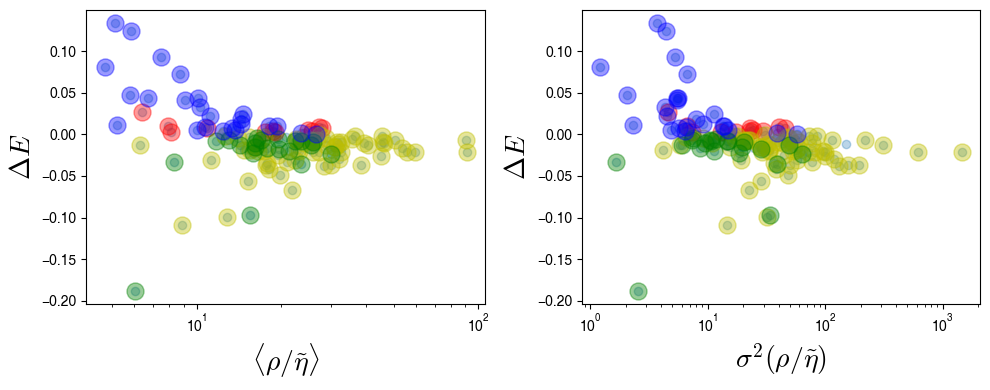

In [112]:
fig = plt.figure(figsize=[10,4])
gs=GridSpec(1,2)
ax=fig.add_subplot(gs[0])
x = np.mean(rho_tilde_eta_age,axis=1)
y = delta_E/data['D']
ax.scatter(x, y, alpha=0.3)
colors=['r', 'y', 'g', 'b']
c=0
for q in [q1, q2, q3, q4]:
    x_q = x.loc[q.index]
    q_idx = q.index.to_list()
    y_q = y[q_idx]
    ax.scatter(x_q, y_q, s=150,c = colors[c], alpha=0.4)
    c+=1
ax.set_xscale('log')
ax.set_xlabel(r'$\langle\rho/{\tilde\eta}\rangle$',size=20)
ax.set_ylabel(r'$\Delta E$',size=20)

ax=fig.add_subplot(gs[1])
x = np.var(rho_tilde_eta_age,axis=1)
y = delta_E/data['D']
ax.scatter(x, y, alpha=0.3)
colors=['r', 'y', 'g', 'b']
c=0
for q in [q1, q2, q3, q4]:
    x_q = x.loc[q.index]
    q_idx = q.index.to_list()
    y_q = y[q_idx]
    ax.scatter(x_q, y_q, s=150,c = colors[c], alpha=0.4)
    c+=1
ax.set_xscale('log')
ax.set_xlabel(r'$\sigma^2(\rho/{\tilde\eta})$',size=20)
ax.set_ylabel(r'$\Delta E$',size=20)

plt.tight_layout()
plt.show()

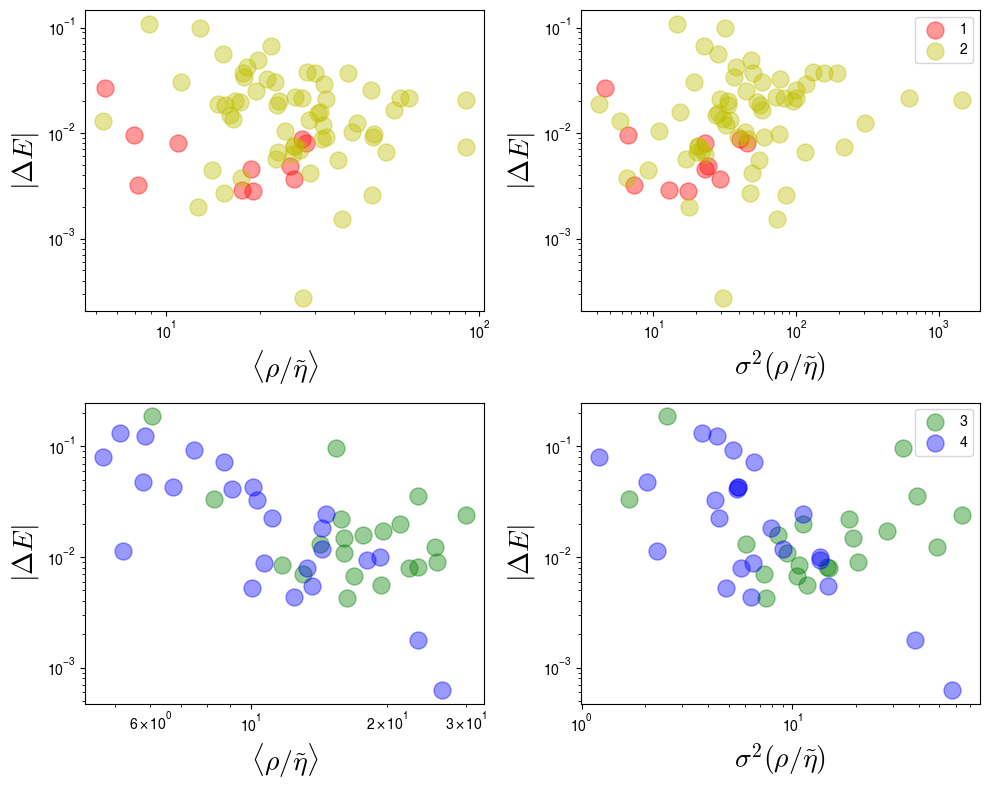

In [111]:
fig = plt.figure(figsize=[10,8])
gs=GridSpec(2,2)

ax=fig.add_subplot(gs[0,0])
x = np.mean(rho_tilde_eta_age,axis=1)

colors=['r', 'y', 'g', 'b']
c=0
for q in [q1, q2]:
    x_q = x.loc[q.index]
    q_idx = q.index.to_list()
    y = np.abs(delta_E/data['D'])
    y_q = y[q_idx]
    # print(f"Color: {colors[c]}, len(x_q): {len(x_q)}, len(y_q): {len(y_q)}")
    ax.scatter(x_q, y_q, s=150,c = colors[c], alpha=0.4)
    c+=1
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(0,0.15)
ax.set_xlabel(r'$\langle\rho/{\tilde\eta}\rangle$',size=20)
ax.set_ylabel(r'$|\Delta E|$',size=20)

ax=fig.add_subplot(gs[0,1])
x = np.var(rho_tilde_eta_age,axis=1)

c=0
labels=[1,2,3,4]
for q in [q1, q2]:
    x_q = x.loc[q.index]
    q_idx = q.index.to_list()
    y = np.abs(delta_E/data['D'])
    y_q = y[q_idx]
    ax.scatter(x_q, y_q, s=150,c = colors[c], alpha=0.4,label=str(labels[c]))
    c+=1
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(0,0.15)
ax.set_xlabel(r'$\sigma^2(\rho/{\tilde\eta})$',size=20)
ax.set_ylabel(r'$|\Delta E|$',size=20)
ax.legend()

ax=fig.add_subplot(gs[1,0])
x = np.mean(rho_tilde_eta_age,axis=1)

for q in [q3, q4]:
    x_q = x.loc[q.index]
    q_idx = q.index.to_list()
    y = np.abs(delta_E/data['D'])
    y_q = y[q_idx]
    ax.scatter(x_q, y_q, s=150,c = colors[c], alpha=0.4)
    c+=1
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(-0.2,0)
ax.set_xlabel(r'$\langle\rho/{\tilde\eta}\rangle$',size=20)
ax.set_ylabel(r'$|\Delta E|$',size=20)

ax=fig.add_subplot(gs[1,1])
x = np.var(rho_tilde_eta_age,axis=1)
c=2
for q in [q3, q4]:
    x_q = x.loc[q.index]
    q_idx = q.index.to_list()
    y = np.abs(delta_E/data['D'])
    y_q = y[q_idx]
    ax.scatter(x_q, y_q, s=150,c = colors[c], alpha=0.4,label=str(labels[c]))
    c+=1
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(-0.2,0)
ax.set_xlabel(r'$\sigma^2(\rho/{\tilde\eta})$',size=20)
ax.set_ylabel(r'$|\Delta E|$',size=20)
ax.legend()

plt.tight_layout()
plt.show()

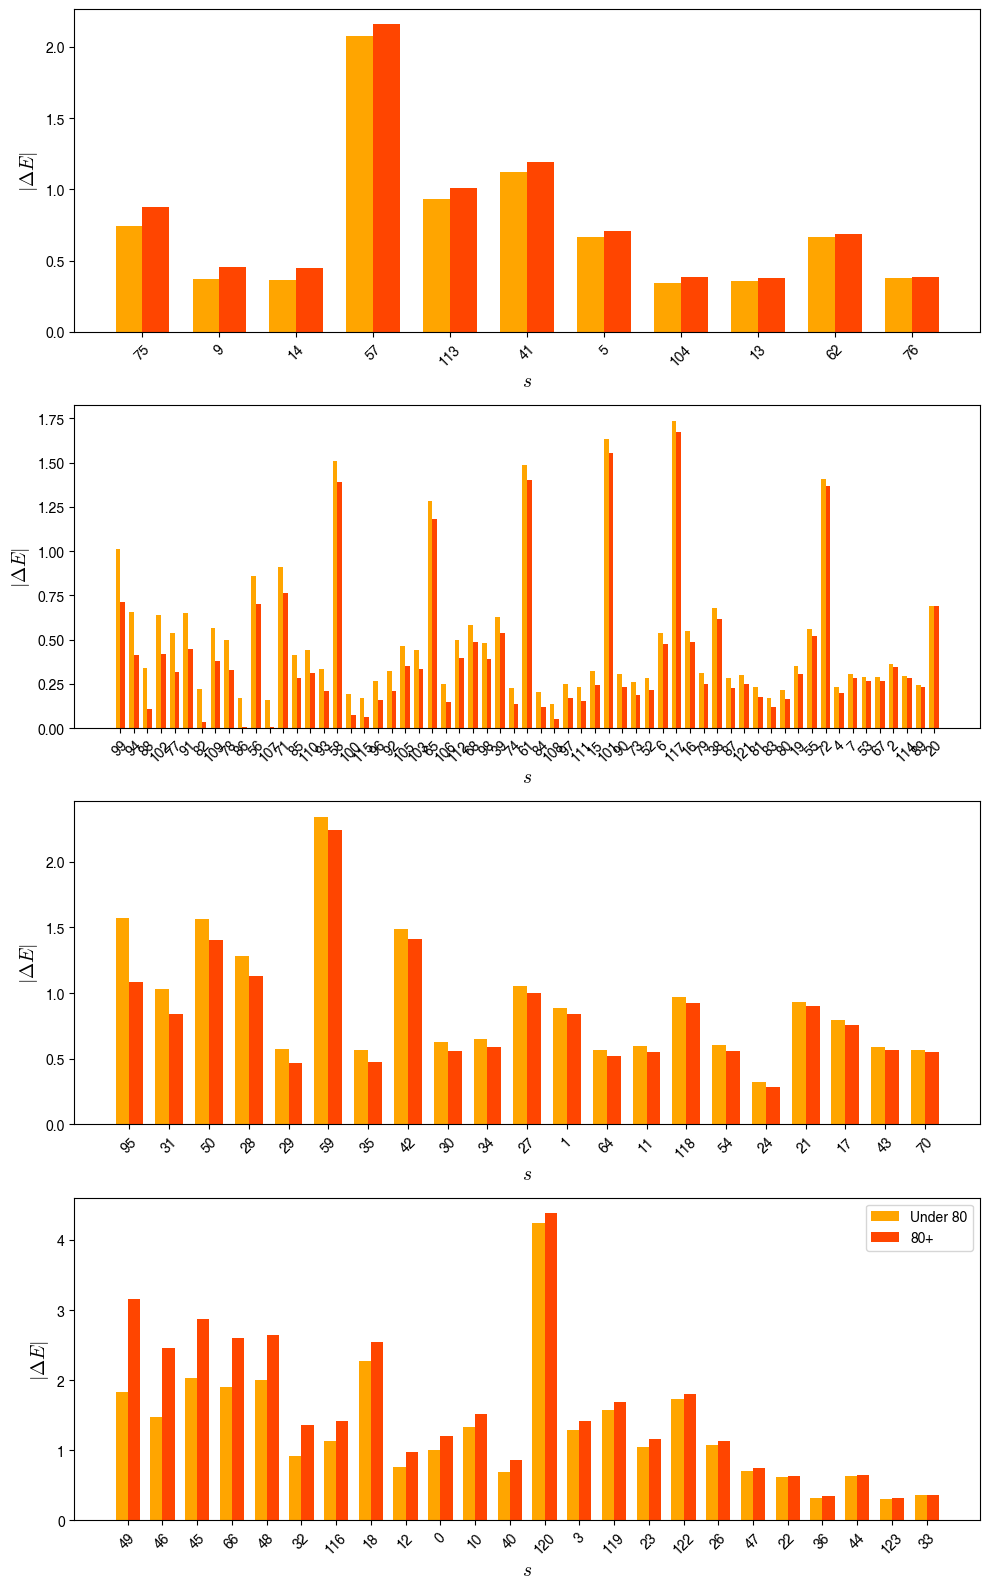

In [127]:
# ΔE 계산
sum_E_under80 = np.sum(delta_E_age[:4, :], axis=0)  # 80세 미만
E_80 = delta_E_age[4]                               # 80세 이상
qn=[q1,q2,q3,q4]
fig = plt.figure(figsize=(10, 16))
gs=GridSpec(4,1)
for i in range(4):
# q1 인덱스만 추출
    q = qn[i]
    q_index = q.index.to_list()

    # 절대값 취하기
    sum_E_under80_q = np.abs(sum_E_under80[q_index])
    E_80_q = np.abs(E_80[q_index])

    # 차이의 절대값 기준 정렬
    diff_q = np.abs(E_80_q - sum_E_under80_q)
    sorted_idx = np.argsort(-diff_q)
    sorted_q_index = [q_index[i] for i in sorted_idx]

    # 정렬된 데이터 추출
    under80_sorted = sum_E_under80[sorted_q_index]
    E80_sorted = E_80[sorted_q_index]


    x = np.arange(len(sorted_q_index))
    width = 0.35

    ax=fig.add_subplot(gs[i])
    ax.bar(x - width/2, np.abs(under80_sorted), width, label='Under 80', color='orange')
    ax.bar(x + width/2, np.abs(E80_sorted), width, label='80+', color='orangered')
    ax.set_xticks(x, sorted_q_index, rotation=45)
    # ax.set_yscale('log')
    ax.set_xlabel(r'$s$', fontsize=14)
    ax.set_ylabel(r'$|\Delta E|$', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [95]:
E_80

array([1.20688629e+00, 8.39735529e-01, 3.43563081e-01, 1.41161242e+00,
       1.96436374e-01, 7.08504887e-01, 4.72951542e-01, 2.83145871e-01,
       9.89180702e-01, 4.51695008e-01, 1.51751085e+00, 5.54042338e-01,
       9.82601723e-01, 3.79535842e-01, 4.44747189e-01, 2.41889925e-01,
       4.87195968e-01, 7.59795814e-01, 2.54820320e+00, 3.03965056e-01,
       6.86936928e-01, 8.99684716e-01, 6.38873781e-01, 1.15770138e+00,
       2.86681592e-01, 2.57901949e-01, 1.12782632e+00, 9.99587418e-01,
       1.13188199e+00, 4.67988384e-01, 5.55317427e-01, 8.43071418e-01,
       1.35609581e+00, 3.64694331e-01, 5.90522975e-01, 4.73193781e-01,
       3.43897681e-01, 5.74036129e-01, 6.17229487e-01, 5.36656786e-01,
       8.56132085e-01, 1.19209990e+00, 1.41160480e+00, 5.68356514e-01,
       6.51300469e-01, 2.87343028e+00, 2.46393524e+00, 7.51350639e-01,
       2.64909782e+00, 3.16354977e+00, 1.40612064e+00, 5.77678083e-01,
       2.12385782e-01, 2.63665436e-01, 5.60842089e-01, 5.19585343e-01,
      

In [79]:
y_q

0      0.032634
3      0.010073
10     0.018283
12     0.024410
18     0.022470
22     0.007905
23     0.009434
26     0.011279
32     0.043102
33     0.000625
36     0.011819
40     0.080539
44     0.004329
45     0.092916
46     0.124089
47     0.043249
48     0.072581
49     0.133221
66     0.041237
116    0.047184
119    0.008821
120    0.005282
122    0.005494
123    0.001791
dtype: float64

In [80]:
x_q

0      10.315229
3      19.345163
10     14.373506
12     14.662680
18     11.144873
22     13.351255
23     18.074164
26      5.211429
32      6.730672
33     26.434687
36     14.414550
40      4.710255
44     12.456117
45      7.478305
46      5.836519
47     10.141229
48      8.727274
49      5.152658
66      9.076673
116     5.785743
119    10.711194
120    10.051962
122    13.669897
123    23.477757
dtype: float64

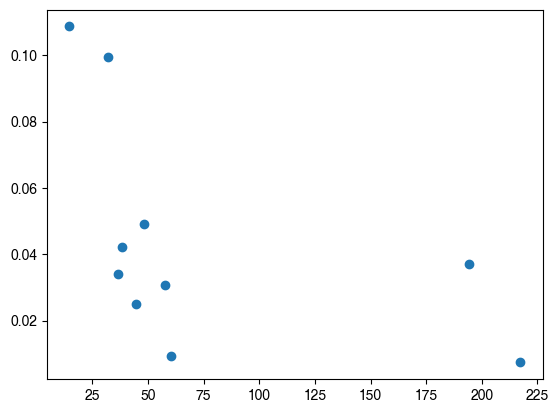

In [74]:
plt.scatter(x_q,y_q)

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from scipy import stats
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
from matplotlib.colors import LinearSegmentedColormap, Normalize

# colors_p = [rgb_to_hex(255,255,255),rgb_to_hex(255,255,255),rgb_to_hex(255,255,255),'#BD66A7','#BD66A7','#BDBDBD','#2D7811']
colors_p = ['#BD66A7','#BDBDBD','#2D7811']
cmap_p = LinearSegmentedColormap.from_list('my_cmap', colors_p, gamma=1)

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'

In [2]:
# geopandas 맵 데이터 불러오기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 현상
# plt.rcParams['font.family'] = 'NamuBaraunGothic' # 한글폰트 전역 설정
path = '/home/users/YongsungKwon/workplace/Yongpyter/dataset/tuberculosis/data/'
kr_sgg = gpd.read_file(path+'korea_map/korea_sigungu/',encoding='cp949')
# kr_sido = kr_sido.drop(7)
kr_sgg = kr_sgg.reset_index()
sido_cd=pd.read_csv(path+'korea_map/sido_code.csv')
kr_sido = gpd.read_file(path+'korea_map/TL_SCCO_CTPRVN',encoding='cp949')
kr_sido = kr_sido.reset_index()

In [3]:
year=2022
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
data = pd.read_csv(path,sep=',')


In [4]:
h_noage_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/no_age/opt_E_h/2022MC_noage_h_opt.csv',sep=',')
h_age_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/2022MC_age_h_opt_a_20.csv')
h = data['h']
y = (h_age_opt['h'] - h_noage_opt['h'])/h
rho = data['N']/data['A']
etatilde = (data['h']/data['A'])/(np.abs(np.log(data['D']/data['N'])))
rhoover = rho/etatilde
data['rhoover']=rhoover
data['y']=y

In [5]:
def search_sido(id):
    # sc=kr_sgg['SIG_CD'][id][:2]
    sc=id[:2]
    # print(sc)
    return list(sido_cd[sido_cd['cd']==int(sc)]['sido'])[0]

In [6]:
y_list = []
r_list = []
for l, e in kr_sgg.iterrows():
	sido = search_sido(e['SIG_CD'])
	sigungu = e['SIG_KOR_NM']

	if len(sigungu) >= 5:
		sigungu = sigungu[:3]

	# data 필터링
	dt = data[(data['sido'] == sido) & (data['sigungu'] == sigungu)]

	# 필터링 후 데이터가 없을 경우 NaN 추가
	if dt.empty:
		y_list.append(np.nan)#np.nan
		r_list.append(np.nan)
	else:
		y_list.append(dt['y'].iloc[0])
		r_list.append(dt['rhoover'].iloc[0])
		

# 결과를 kr_sgg에 추가
kr_sgg['y'] = y_list
kr_sgg['rhoover'] = r_list

/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


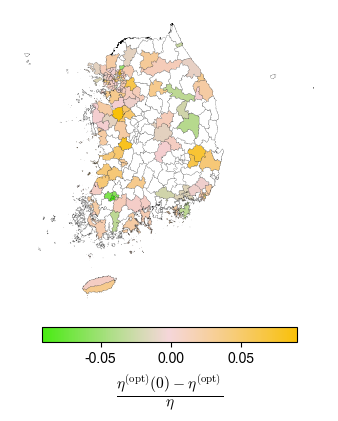

In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure()
ax = fig.add_subplot()

colors = ["#47EC10", "#F4CED2D2", "#F9C108"]#, '#FFFFFF'
norm = Normalize(vmin=min(kr_sgg['y']), vmax=max(kr_sgg['y']))
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, gamma=1)

# 지도 그리기
kr_sgg.plot(column='y', ec='k', cmap=cmap, legend=False, norm=norm, alpha=1, linewidth=0.1, ax=ax)
kr_sgg[kr_sgg['y'].isna()].plot(ec='k', color='#FFFFFF', alpha=1, linewidth=0.1, ax=ax)

# 축 제거
ax.axis('off')

# ✅ Colorbar 축을 현재 ax에 맞게 inset_axes로 생성
cbar_ax = inset_axes(ax, width='80%', height='5%', loc='lower center',
                     bbox_to_anchor=(0, -0.1, 1, 1), bbox_transform=ax.transAxes, borderpad=0)

# 컬러바 생성
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'$\frac{\eta^\mathrm{(opt)}(0)-\eta^\mathrm{(opt)}}{\eta}$', fontsize=16)
cbar.ax.tick_params(labelsize=10)
# 레이아웃 조정
plt.subplots_adjust(bottom=0.25)  # 하단 여유 공간 확보
# plt.tight_layout()
plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/newly_fig/opt_a0_noage_map.png',dpi=300,transparent=True)
plt.show()


(array([133.,  41.,  50.,  13.,   5.,   6.,   0.,   0.,   1.,   1.]),
 array([  1.        ,  52.79952765, 104.5990553 , 156.39858294,
        208.19811059, 259.99763824, 311.79716589, 363.59669354,
        415.39622118, 467.19574883, 518.99527648]),
 <BarContainer object of 10 artists>)

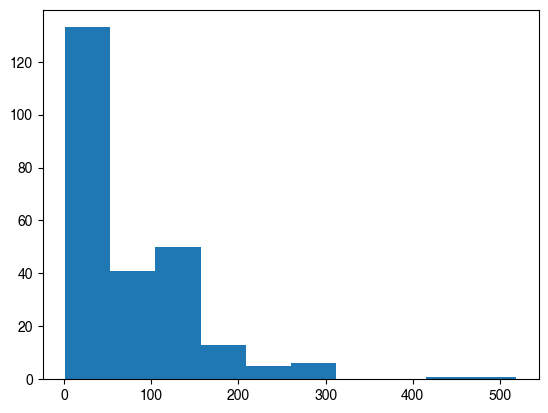

In [222]:
plt.hist(kr_sgg['rhoover'])

In [218]:
min(kr_sgg['rhoover'])

23.19092538080834

# 1 & 3 사분면 표시(amin)

In [253]:
year=2022
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
data = pd.read_csv(path,sep=',')
a_min_i = find_min_a(data)
a_max_i = 23
h_0_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_20.csv')
h_min_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_'+str(a_min_i)+'.csv')
h_max_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_'+str(a_max_i)+'.csv')
y_0 = h_0_opt['h']/data['h']
y_min = h_min_opt['h']/data['h']
a_min=np.linspace(-2,1,31)[a_min_i]
a_max=np.linspace(-2,1,31)[a_max_i]

In [254]:
a_min

-1.4

In [255]:
a_min_i

6

In [256]:
# 1. 필요한 컬럼 정의
cols = data.columns[10:15]

# 2. 계산
N_age = data[cols].multiply(data['N'], axis=0)
rho_age = N_age.divide(data['A'], axis=0)
tilde_eta_age = data[data.columns[24:24+len(cols)]]

# 3. 위치기반으로 element-wise 연산 → 다시 DataFrame으로 되살림
rho_tilde_eta_age = pd.DataFrame(
    rho_age.values / tilde_eta_age.values,
    columns=cols,
    index=data.index
)

In [257]:
delta_H = h_min_opt - h_0_opt
b_amin = b(data, a=a_min)
b_a0 = b(data, a=0) 
delta_E = E(data, h_pd = h_min_opt, a = a_min, b=b_amin) - E(data, h_pd = h_0_opt, a=0, b=b_a0)

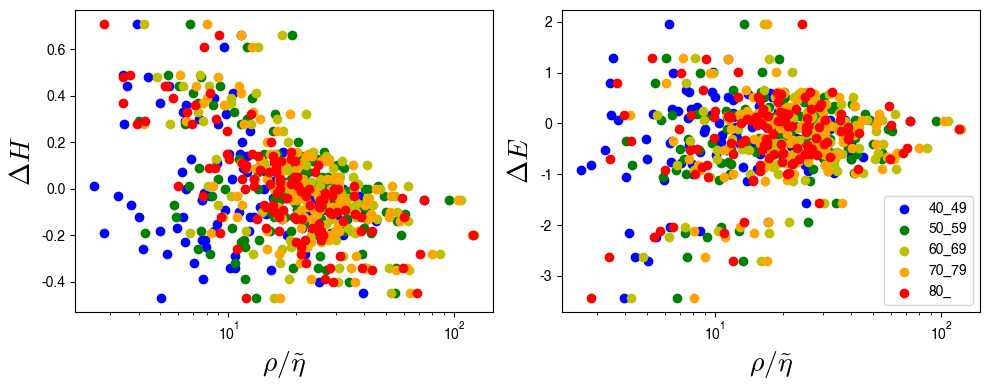

In [258]:
fig = plt.figure(figsize=[10,4])
gs = GridSpec(1, 2)
colors = ['b', 'g', 'y', 'orange','r']
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    ax1.scatter(x, delta_H, c=colors[i])
    ax2.scatter(x, delta_E, c=colors[i],label=cols[i][2:])
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlabel(r'$\rho/{\tilde\eta}$',size=20)
ax2.set_xlabel(r'$\rho/{\tilde\eta}$',size=20)
ax1.set_ylabel(r'$\Delta H$',size=20)
ax2.set_ylabel(r'$\Delta E$',size=20)
ax2.legend()
plt.tight_layout()
plt.show()

In [259]:
delta_E_age = np.array(E_a(data, h_pd = h_min_opt, a = a_min, b=b_amin))- np.array(E_a(data, h_pd = h_0_opt, a=0, b=b_a0))

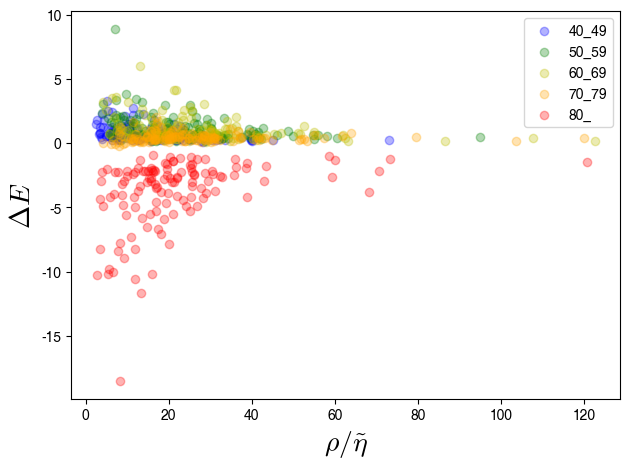

In [260]:
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)
# plt.xscale('log')
plt.xlabel(r'$\rho/{\tilde\eta}$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

# 1 & 3 사분면 표시

In [261]:
df = pd.DataFrame({
    'dE': delta_E,
    'dH': delta_H['h']
})


In [262]:
df_clean = df.dropna()
q1 = df_clean[(df_clean['dE'] > 0) & (df_clean['dH'] > 0)]
q3 = df_clean[(df_clean['dE'] < 0) & (df_clean['dH'] < 0)]

In [263]:
q3.index

Index([  2,   7,   9,  13,  14,  15,  19,  20,  38,  39,  41,  52,  53,  55,
        56,  57,  58,  61,  65,  67,  68,  71,  72,  73,  74,  76,  77,  78,
        79,  81,  82,  83,  84,  85,  86,  87,  88,  89,  97,  98, 100, 101,
       102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 121],
      dtype='int64')

In [264]:
q1.index

Index([  1,  11,  17,  18,  21,  22,  24,  25,  26,  27,  28,  29,  30,  31,
        33,  34,  35,  36,  37,  40,  42,  43,  44,  47,  50,  54,  59,  63,
        64,  70,  95, 118, 122, 123],
      dtype='int64')

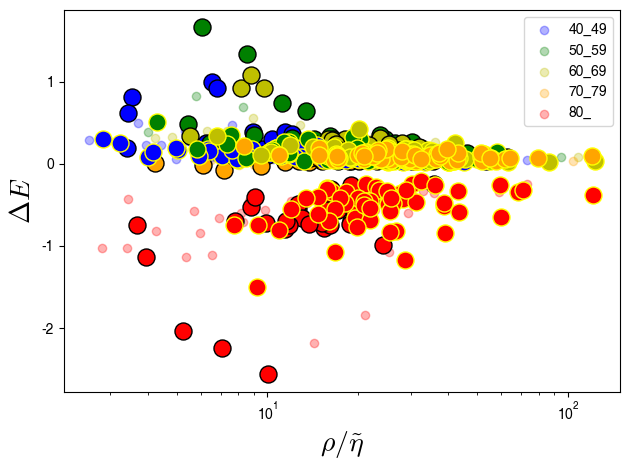

In [265]:
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)

#q1
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q1 = x.loc[q1.index]
    q1_idx = q1.index.to_list()
    y_q1 = y[q1_idx]
    plt.scatter(x_q1, y_q1, c=colors[i], alpha=1, s=150,ec = 'k')
#q3
for i in range(5):
    x = rho_tilde_eta_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q3 = x.loc[q3.index]
    q3_idx = q3.index.to_list()
    y_q3 = y[q3_idx]
    plt.scatter(x_q3, y_q3, c=colors[i], alpha=1, s=150,ec = 'yellow')
plt.xscale('log')
plt.xlabel(r'$\rho/{\tilde\eta}$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

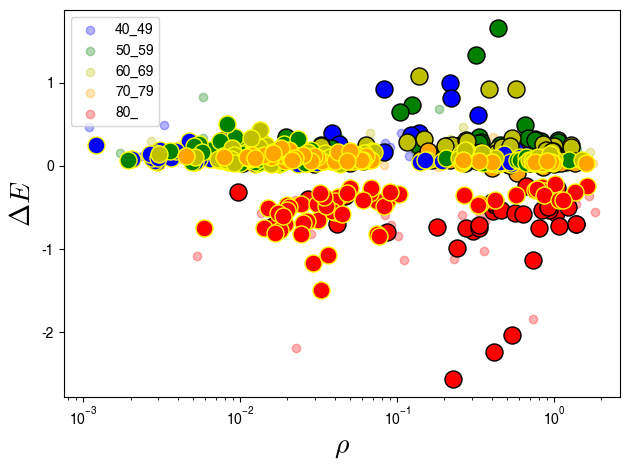

In [266]:
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    plt.scatter(x, y, c=colors[i],label=cols[i][2:], alpha=0.3)

#q1
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q1 = x.loc[q1.index]
    q1_idx = q1.index.to_list()
    y_q1 = y[q1_idx]
    plt.scatter(x_q1, y_q1, c=colors[i], alpha=1, s=150,ec = 'k')
#q3
for i in range(5):
    x = rho_age['RN' + cols[i][2:]]
    y = delta_E_age[i]/data['D']
    x_q3 = x.loc[q3.index]
    q3_idx = q3.index.to_list()
    y_q3 = y[q3_idx]
    plt.scatter(x_q3, y_q3, c=colors[i], alpha=1, s=150,ec = 'yellow')
plt.xscale('log')
plt.xlabel(r'$\rho$',size=20)
plt.ylabel(r'$\Delta E$',size=20)
plt.legend()
plt.tight_layout()
plt.show()

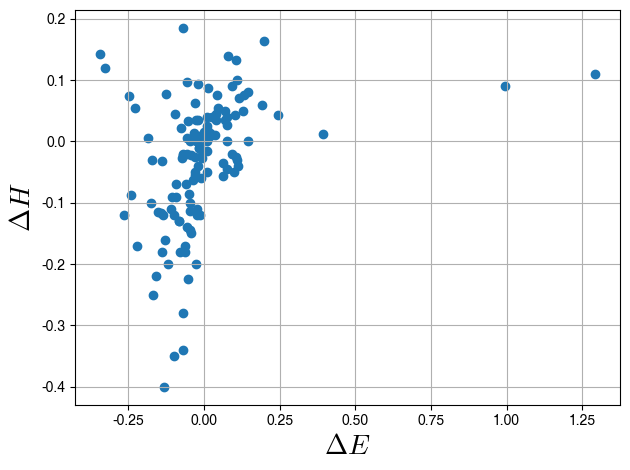

In [267]:
plt.scatter(delta_E/data['D'], delta_H['h']/data['h'])
plt.grid()
plt.ylabel(r'$\Delta H$',size=20)
plt.xlabel(r'$\Delta E$',size=20)
plt.tight_layout()
plt.show()

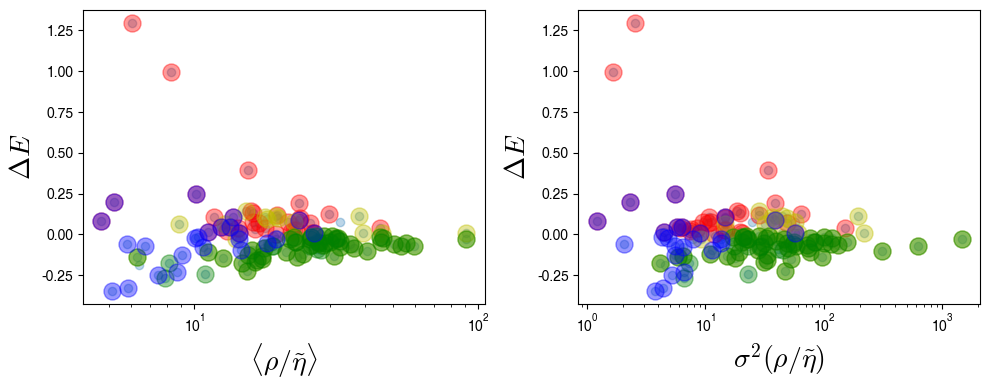

In [268]:
fig = plt.figure(figsize=[10,4])
gs=GridSpec(1,2)
ax=fig.add_subplot(gs[0])
x = np.mean(rho_tilde_eta_age,axis=1)
y = delta_E/data['D']
ax.scatter(x, y, alpha=0.3)
colors=['r', 'y', 'g', 'b']
c=0
for q in [q1, q2, q3, q4]:
    x_q = x.loc[q.index]
    q_idx = q.index.to_list()
    y_q = y[q_idx]
    ax.scatter(x_q, y_q, s=150,c = colors[c], alpha=0.4)
    c+=1
ax.set_xscale('log')
ax.set_xlabel(r'$\langle\rho/{\tilde\eta}\rangle$',size=20)
ax.set_ylabel(r'$\Delta E$',size=20)

ax=fig.add_subplot(gs[1])
x = np.var(rho_tilde_eta_age,axis=1)
y = delta_E/data['D']
ax.scatter(x, y, alpha=0.3)
colors=['r', 'y', 'g', 'b']
c=0
for q in [q1, q2, q3, q4]:
    x_q = x.loc[q.index]
    q_idx = q.index.to_list()
    y_q = y[q_idx]
    ax.scatter(x_q, y_q, s=150,c = colors[c], alpha=0.4)
    c+=1
ax.set_xscale('log')
ax.set_xlabel(r'$\sigma^2(\rho/{\tilde\eta})$',size=20)
ax.set_ylabel(r'$\Delta E$',size=20)

plt.tight_layout()
plt.show()

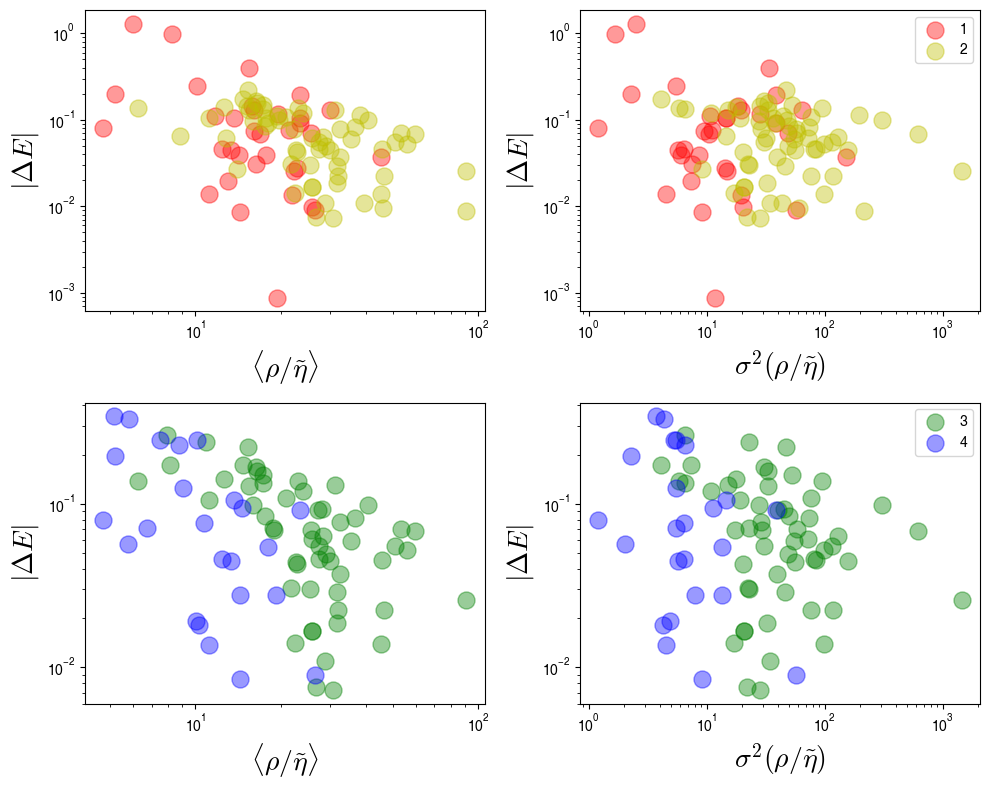

In [269]:
fig = plt.figure(figsize=[10,8])
gs=GridSpec(2,2)

ax=fig.add_subplot(gs[0,0])
x = np.mean(rho_tilde_eta_age,axis=1)

colors=['r', 'y', 'g', 'b']
c=0
for q in [q1, q2]:
    x_q = x.loc[q.index]
    q_idx = q.index.to_list()
    y = np.abs(delta_E/data['D'])
    y_q = y[q_idx]
    # print(f"Color: {colors[c]}, len(x_q): {len(x_q)}, len(y_q): {len(y_q)}")
    ax.scatter(x_q, y_q, s=150,c = colors[c], alpha=0.4)
    c+=1
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(0,0.15)
ax.set_xlabel(r'$\langle\rho/{\tilde\eta}\rangle$',size=20)
ax.set_ylabel(r'$|\Delta E|$',size=20)

ax=fig.add_subplot(gs[0,1])
x = np.var(rho_tilde_eta_age,axis=1)

c=0
labels=[1,2,3,4]
for q in [q1, q2]:
    x_q = x.loc[q.index]
    q_idx = q.index.to_list()
    y = np.abs(delta_E/data['D'])
    y_q = y[q_idx]
    ax.scatter(x_q, y_q, s=150,c = colors[c], alpha=0.4,label=str(labels[c]))
    c+=1
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(0,0.15)
ax.set_xlabel(r'$\sigma^2(\rho/{\tilde\eta})$',size=20)
ax.set_ylabel(r'$|\Delta E|$',size=20)
ax.legend()

ax=fig.add_subplot(gs[1,0])
x = np.mean(rho_tilde_eta_age,axis=1)

for q in [q3, q4]:
    x_q = x.loc[q.index]
    q_idx = q.index.to_list()
    y = np.abs(delta_E/data['D'])
    y_q = y[q_idx]
    ax.scatter(x_q, y_q, s=150,c = colors[c], alpha=0.4)
    c+=1
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(-0.2,0)
ax.set_xlabel(r'$\langle\rho/{\tilde\eta}\rangle$',size=20)
ax.set_ylabel(r'$|\Delta E|$',size=20)

ax=fig.add_subplot(gs[1,1])
x = np.var(rho_tilde_eta_age,axis=1)
c=2
for q in [q3, q4]:
    x_q = x.loc[q.index]
    q_idx = q.index.to_list()
    y = np.abs(delta_E/data['D'])
    y_q = y[q_idx]
    ax.scatter(x_q, y_q, s=150,c = colors[c], alpha=0.4,label=str(labels[c]))
    c+=1
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(-0.2,0)
ax.set_xlabel(r'$\sigma^2(\rho/{\tilde\eta})$',size=20)
ax.set_ylabel(r'$|\Delta E|$',size=20)
ax.legend()

plt.tight_layout()
plt.show()

In [274]:
sum_E_under80

array([ 3.84367829,  3.54927189,  2.02700291,  5.45651832,  1.29031174,
        3.02489829,  2.57519487,  1.76167124,  4.25586168,  1.99876452,
        5.31804209,  2.49755218,  3.21104515,  1.66028514,  1.89872497,
        1.90560469,  2.48499336,  3.19627702,  8.53935931,  1.76463236,
        3.20688709,  3.23543311,  2.29644931,  4.40277677,  1.3003849 ,
        1.39045554,  3.75829787,  3.83110784,  4.74887309,  2.18834934,
        2.36555431,  3.32569094,  3.61636865,  1.62134433,  2.49564299,
        2.23958443,  1.34583399,  2.7462271 ,  3.70295169,  3.19833613,
        2.42305528,  5.3621037 ,  6.0238023 ,  2.44416265,  2.51827105,
        7.98169726,  5.59510056,  2.80901763,  8.00050258,  6.86082403,
        6.50763384,  2.66264764,  1.66726176,  1.32529361,  2.35898076,
        2.66955467,  4.09150651,  9.72125067,  7.25294855, 10.20301503,
        3.34537466,  6.89491304,  2.94848379,  4.86190139,  2.26780466,
        5.99314597,  7.65591615,  1.32529361,  2.87534084,  5.20

In [275]:
E_80

array([ -3.95234097,  -3.39376203,  -3.00954572,  -5.78666258,
        -1.24642926,  -3.45226414,  -2.50834643,  -2.17211172,
        -4.61624463,  -2.93127082,  -5.5969964 ,  -2.44882058,
        -4.06297265,  -2.07558051,  -2.72073432,  -2.57118348,
        -2.41953319,  -2.78117507,  -8.37420285,  -2.2407727 ,
        -3.81133342,  -2.2408688 ,  -2.16282936,  -4.99926241,
        -1.08854389,  -1.20355905,  -2.97048984,  -3.17384359,
        -3.72936787,  -1.61033397,  -1.8973463 ,  -2.03253449,
        -4.32371877,  -1.56739966,  -1.97097012,  -1.72600595,
        -1.328799  ,  -2.67885317,  -4.39596149,  -3.48879225,
        -2.26348235,  -6.49522608,  -5.4971499 ,  -2.23907203,
        -2.38105678, -10.20670586,  -8.21803702,  -2.56382746,
       -10.0461841 , -10.29409968,  -5.90046438,  -2.69586398,
        -1.82419274,  -1.37517136,  -2.24047385,  -2.71482003,
        -4.16402142, -11.65674175,  -7.82893977, -10.1872298 ,
        -2.96745305,  -7.10772056,  -3.34063839,  -4.64

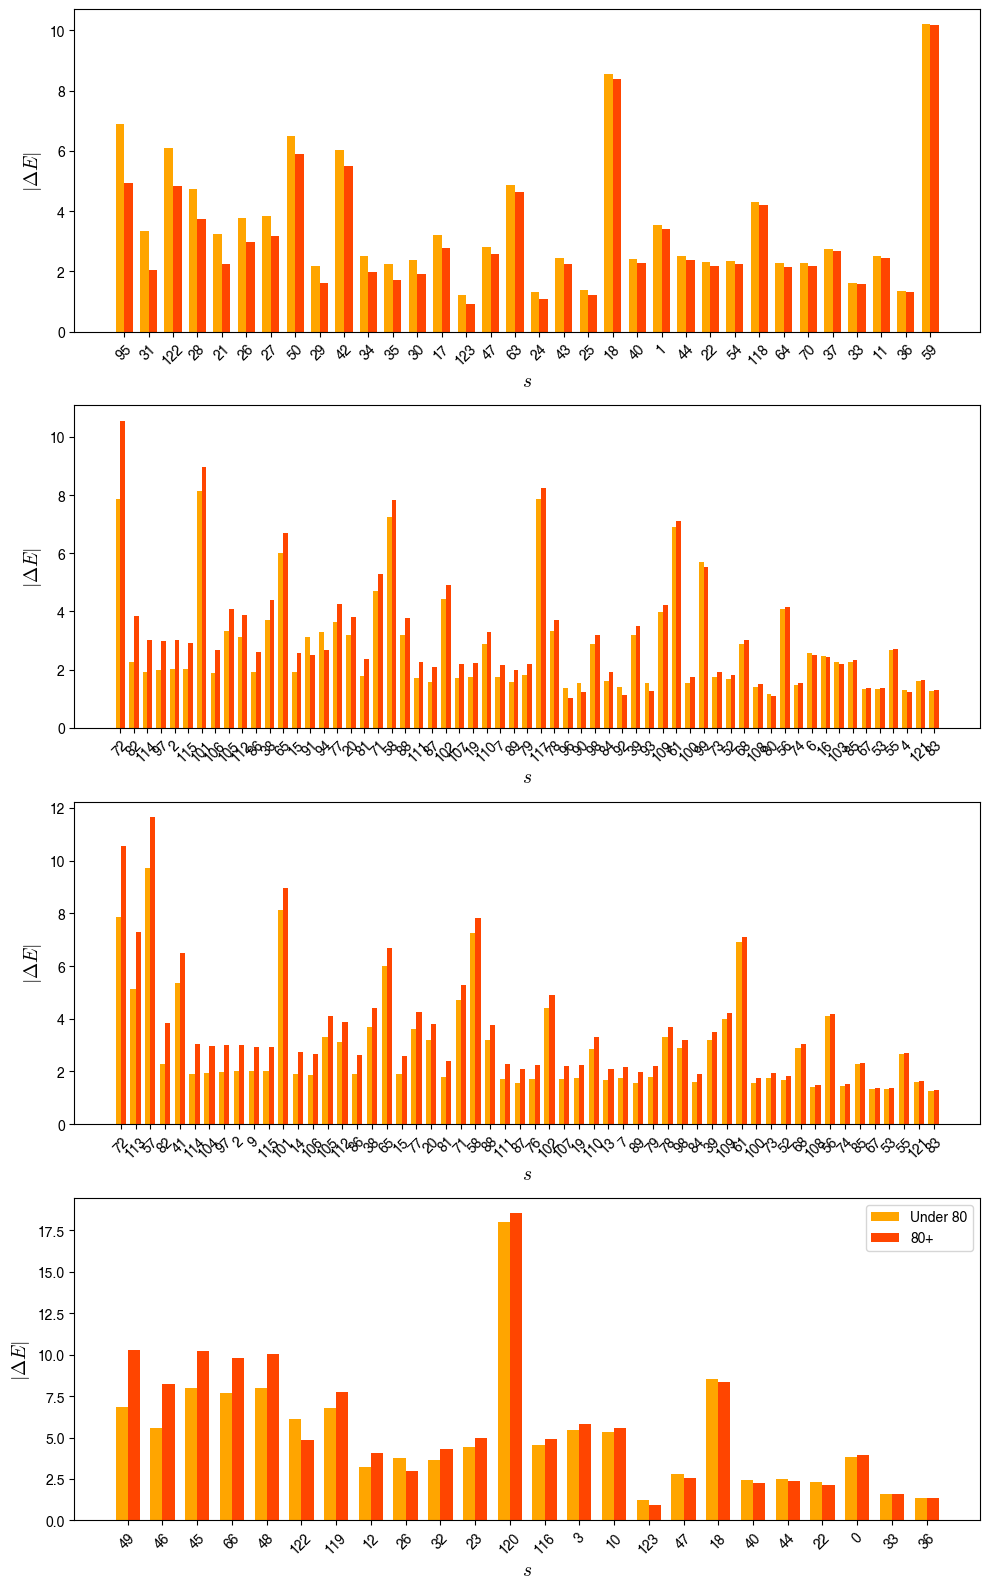

In [276]:
# ΔE 계산
sum_E_under80 = np.sum(delta_E_age[:4, :], axis=0)  # 80세 미만
E_80 = delta_E_age[4]                               # 80세 이상
qn=[q1,q2,q3,q4]
fig = plt.figure(figsize=(10, 16))
gs=GridSpec(4,1)
for i in range(4):
# q1 인덱스만 추출
    q = qn[i]
    q_index = q.index.to_list()

    # 절대값 취하기
    sum_E_under80_q = np.abs(sum_E_under80[q_index])
    E_80_q = np.abs(E_80[q_index])

    # 차이의 절대값 기준 정렬
    diff_q = np.abs(E_80_q - sum_E_under80_q)
    sorted_idx = np.argsort(-diff_q)
    sorted_q_index = [q_index[i] for i in sorted_idx]

    # 정렬된 데이터 추출
    under80_sorted = sum_E_under80[sorted_q_index]
    E80_sorted = E_80[sorted_q_index]


    x = np.arange(len(sorted_q_index))
    width = 0.35

    ax=fig.add_subplot(gs[i])
    ax.bar(x - width/2, np.abs(under80_sorted), width, label='Under 80', color='orange')
    ax.bar(x + width/2, np.abs(E80_sorted), width, label='80+', color='orangered')
    ax.set_xticks(x, sorted_q_index, rotation=45)
    # ax.set_yscale('log')
    ax.set_xlabel(r'$s$', fontsize=14)
    ax.set_ylabel(r'$|\Delta E|$', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()
